<a href="https://colab.research.google.com/github/denotevn/Artificial-intelligence-and-applications/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# METHOD KMEAN

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import plotly.express as px

In [ ]:
# 4 drops generating
from sklearn.datasets._samples_generator import make_blobs
# numbers features default = 2 
X, y_true = make_blobs(n_samples= 400, centers= 4, cluster_std= 0.60, random_state= 0 )
#Data display
px.scatter(X[:,0],X[:,1])

In [ ]:

# Creation of 4 classes < training  predict
kmeans = KMeans(n_clusters= 4,init='k-means++')
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


In [ ]:
#Visualization
# Visualise
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=X[:,0], y=X[:,1],
    marker_color= y_kmeans,
    mode='markers'
))

fig.add_trace(go.Scatter(
    x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1],
    marker_color='rgba(255, 182, 255, .9)',
    marker_size=30,
    mode='markers'
))


In [ ]:
# METHOD DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
#Initialize data for the model
X, labels_true = make_blobs(n_samples=1997, centers=4, cluster_std=0.45,
                            random_state=0)
X = StandardScaler().fit_transform(X)

In [ ]:
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [ ]:
# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

In [ ]:
print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 4
Estimated number of noise points: 2


In [ ]:

# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

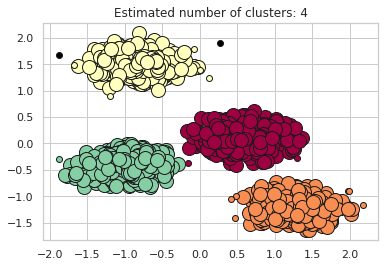

In [ ]:
# Plot result
import matplotlib.pyplot as plt
%matplotlib inline

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

Working with Mall Customer Segmentation Data

In [ ]:
import pandas as pd
#Read data
datasets = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine_Competition/Data/Mall Customer Segmentation Data/Mall_Customers.csv")
datasets.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
#Convert gender to digital form 0.1
labelsdict = {'Male':0,'Female':1}
datasets['Gender'] = datasets['Gender'].apply(lambda x : labelsdict[x])
datasets.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [ ]:
datasets.shape

(200, 5)

In [ ]:
datasets.isnull().values.any()

False

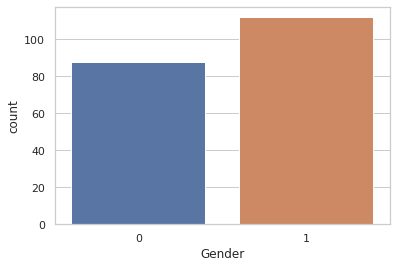

In [ ]:
#Compare the number of men and women in the Gender  column using countplot()
sns.set_theme(style = 'whitegrid')
sns.countplot(data = datasets,x = 'Gender')

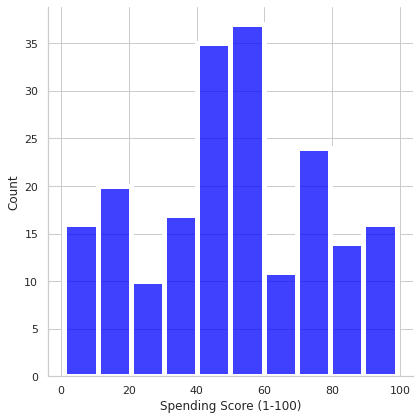

In [ ]:
sns.displot(data = datasets, x = 'Spending Score (1-100)',bins = 10, height=6, linewidth = 5, color = 'blue')

In [ ]:
# remove the object columns
#cloumns customerID useless
X= pd.get_dummies(datasets.drop('CustomerID', axis=1))
from sklearn.preprocessing import StandardScaler


In [ ]:
#Creating and Fitting a KMeans Model:
from sklearn.cluster import KMeans
#inertia_ Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided.
ssd= []
scaler_X = datasets.values
for k in range(2,10):
  model = KMeans(n_clusters= k)
  model.fit(scaler_X)
  ssd.append(model.inertia_)

Text(0, 0.5, 'Sum of Squared Distances')

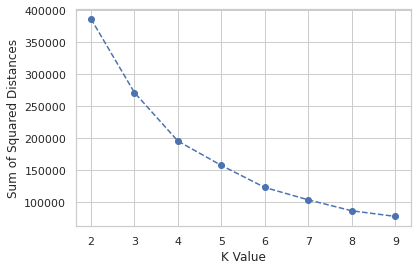

In [ ]:
#Display to select the most efficient cluster 
plt.plot(range(2,10), ssd, 'o--')
plt.xlabel('K Value')
plt.ylabel('Sum of Squared Distances')


In [ ]:
#Method kmean with 5 clusters
kmeans = KMeans(n_clusters = 5)
labels = kmeans.fit_predict(scaler_X)
#labels.reshape(1,200)
print(labels)
labels.shape

[4 4 1 4 4 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 1 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


(200,)

In [ ]:
#Showing results
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=scaler_X[:,3], y=scaler_X[:,4],
    marker_color= kmeans.labels_,
    mode='markers'
))

fig.add_trace(go.Scatter(
    x=kmeans.cluster_centers_[:,3], y=kmeans.cluster_centers_[:,4],
    marker_color='rgba(255, 182, 193, .9)',
    marker_size=30,
    mode='markers'
))


In [ ]:
#Method DBSCAN using columns 3,4
data1 = scaler_X[:,3:]
dbscann = DBSCAN(eps = 9,min_samples= 4)
labels1 = dbscann.fit_predict(data1)
plt.figure(figsize=(12,8))
#Visualize the results obtained
px.scatter(data1[:,0],data1[:,1], color = labels1)

<Figure size 864x576 with 0 Axes>